# ***Exploratory Data Analisys - Análisis sobre los hábitos de vida del ciudadano***
## ➡️ **Visualizaciones y relaciones Eentre variables**
------

### 🗒️**Bloque de contenidos:**

1. [Importación de módulos](#1-importación-de-módulos)
2. [Carga del dataset limpio](#2-carga-del-dataset-limpio)

### **1. Importación de módulos**

In [1]:
# Ajusto la ruta
%cd ..

c:\Users\sorim\Documents\Data_Science\Evolve\repos\projects-evolve\EDA


In [2]:
from scripts.visualization import distribucion_categoricas, distribucion_numericas, distribucion_sueño
from scripts.variables import orden_categorias
import pandas as pd


### **2. Carga del dataset limpio**

In [3]:
df = pd.read_csv('./data/data_clean.csv', low_memory = False) # Me salía un warning y me recomendó poner este argumento a False.
df.head()

,ejercicio,asma,cancer,grupo_edad,ingresos,educacion,empleo,estado,IMC,sueño_h,fumar,alcohol,salud_mental_malos,salud_general,salud_fisica_mala,diabetes,enf_cardio,sueño_cat
0,No,No,No,Age 80 or older,Refused,Graduated from College or Technical School,Retired,Alabama,NULO,8.0,No,No drinks in past 30 days,NaN,Very good,NaN,Yes,No,Más de 7h
1,No,No,Yes,Age 80 or older,"$25,000 to < $35,000",Graduated High School,Self-employed,Alabama,Overweight,6.0,No,No drinks in past 30 days,NaN,Excellent,NaN,No,No,Entre 4 y 7h
2,Yes,No,No,Age 55 to 59,"$150,000 to < $200,000",Graduated from College or Technical School,Retired,Alabama,Overweight,5.0,No,No drinks in past 30 days,3.0,Very good,2.0,No,No,Entre 4 y 7h
3,Yes,Yes,No,NULO,Don’t know/Not sure,Graduated High School,Retired,Alabama,Normal Weight,7.0,Yes,No drinks in past 30 days,NaN,Excellent,NaN,No,No,Entre 4 y 7h
4,Yes,No,No,Age 40 to 44,"$25,000 to < $35,000",Attended College or Technical School,A homemaker,Alabama,Normal Weight,9.0,No,2 days per week,NaN,Fair,2.0,No,No,Más de 7h


### **3. Distribución final de las variables**

Una vez hecha todas las transformaciones pertinentes, visualizamos únicamente aquella que hemos transformado y no hemos visto su distribución siendo de tipo categórica.

In [4]:
num_cols = ['salud_mental_malos', 'salud_fisica_mala']
cat_cols = [col for col in df.columns if col not in num_cols and col != 'sueño_h']

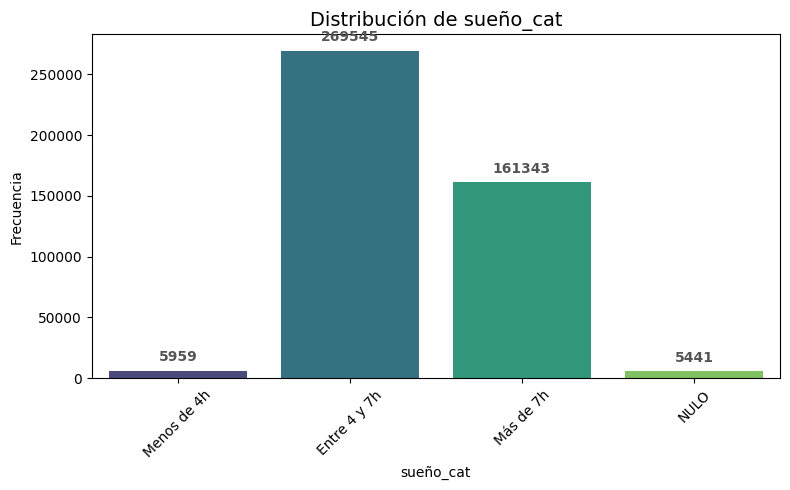

In [ ]:
distribucion_sueño(df, 'sueño_cat')


Al categorizar esta variable, el ruido que puede generar los outliers es menor.

Se puede observar que los valores se concentran en la etiquea de entre 4 y 7h y en el de más de 7h

### **4. Relaciones clave entre variables** 

En este apartado se analizarán las **relaciones más relevantes** entre las variables del dataset, siempre desde un enfoque exploratorio. Aunque este análisis no pretende establecer causalidad, sí permite identificar patrones, tendencias y posibles asociaciones que pueden ser útiles para futuros modelos o hipótesis.

El **objetivo** es responder a preguntas como:

- ¿Cómo se relacionan los hábitos con la salud percibida?

- ¿Existen combinaciones de factores que parezcan afectar al bienestar general?

- ¿Qué variables muestran patrones consistentes entre sí?

- ¿Hay diferencias entre grupos específicos?

A continuación se describen las principales relaciones que se explorarán:


#### ***4.1. Relación entre actividad física y salud mental***

La actividad física es uno de los factores más estudiados dentro del bienestar psicológico.

**Aspectos que se investigarán**:

- ¿Reportan mejor salud mental las personas que realizan actividad física de manera regular?

- ¿Qué ocurre con las personas que declaran no realizar ejercicio?

In [9]:
import matplotlib.pyplot as plot
import seaborn as sns

def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()

In [10]:
num_cols

['salud_mental_malos', 'salud_fisica_mala']

In [13]:
plot_categorical_numerical_relationship(df, 'ejercicio', 'salud_mental_malos', show_values=False, measure='mean')